In [3]:
import pandas as pd
import seaborn as sns
import re
sns.set()
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
plt.rc("font", size=14)
import warnings
warnings.simplefilter(action='ignore')

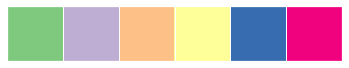

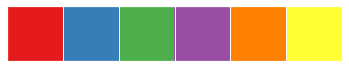

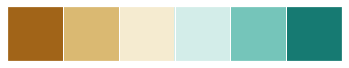

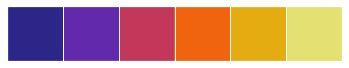

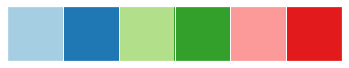

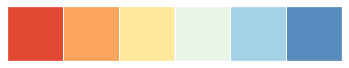

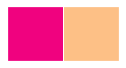

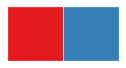

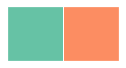

In [4]:
# seaborn color palettes 

palette_1 = sns.color_palette('Accent', 6)
palette_2 = sns.color_palette('Set1', 6)
palette_3 = sns.color_palette('BrBG')
palette_4 = sns.color_palette('CMRmap')
palette_5 = sns.color_palette('Paired', 6)
palette_6 = sns.color_palette('RdYlBu')
palette_binary_1 = sns.color_palette('Accent_r', 2)
palette_binary_2 = sns.color_palette('Set1', 2)
palette_binary_3 = sns.color_palette('Set2', 2)

for color in [palette_1, palette_2, palette_3, palette_4, palette_5, 
              palette_6, palette_binary_1, palette_binary_2, palette_binary_3]:
        sns.palplot(color)

In [5]:
Train = pd.read_csv("../input/titanic/train.csv", header=0)

In [6]:
test = pd.read_csv("../input/titanic/test.csv", header=0)

In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train = pd.concat([Train,test],axis=0)

In [10]:
train.shape

(1309, 12)

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


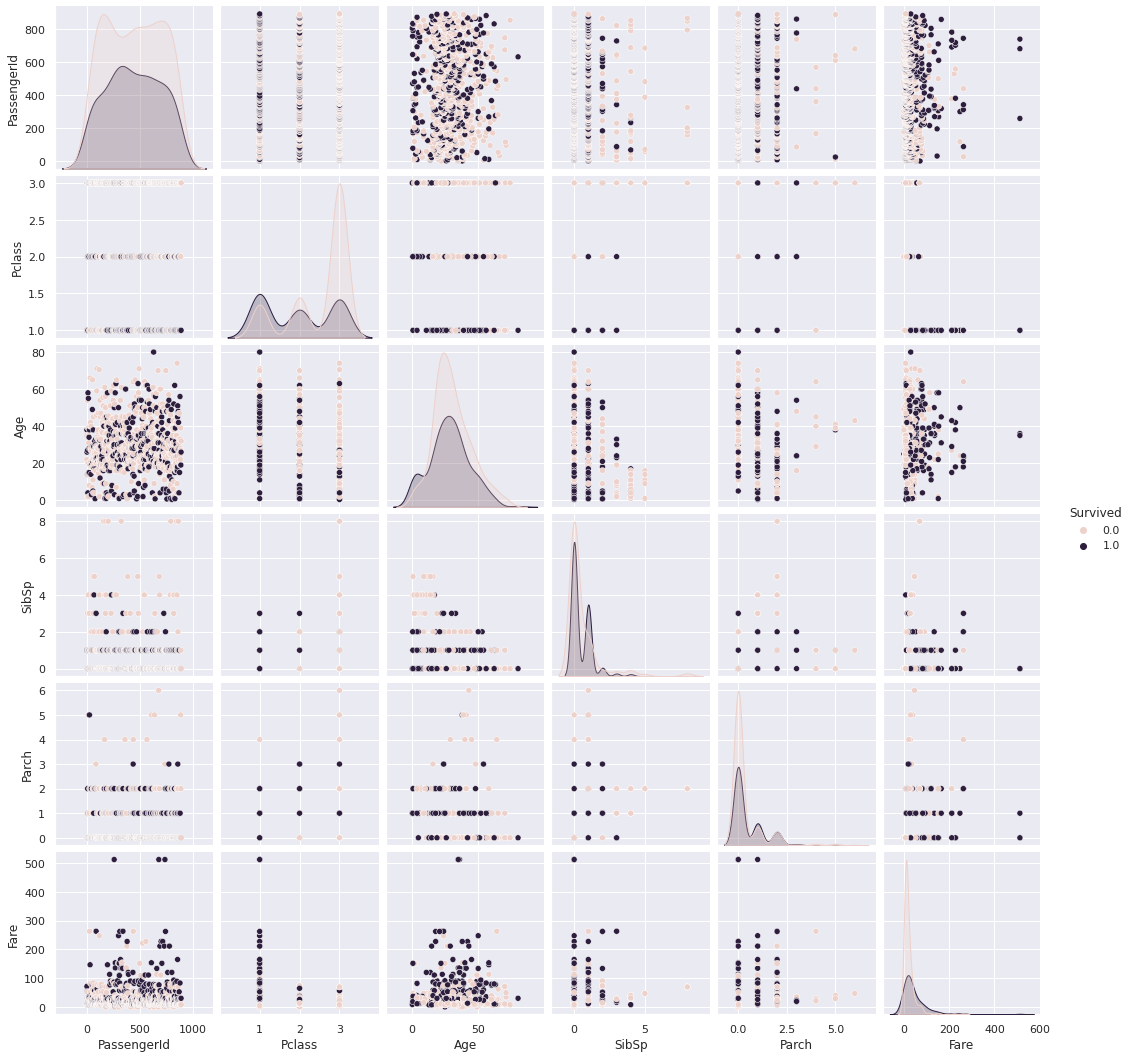

In [12]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=train, hue = 'Survived')
plt.savefig("palette_binary_1")

## Missing Vlues

In [13]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [14]:
train.Fare= train.Fare.fillna(train.Fare.mean()) 

In [15]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train['Embarked'].isnull().sum()/train.shape[0])*100))

Percent of missing "Embarked" records is 0.15%


In [16]:
train.Age= train.Age.fillna(train.Age.median()) #filling missing values by median

###### here most common boarding port of embarkation is S.. so we replace  Nan value by s

In [17]:
train["Embarked"].fillna(train['Embarked'].value_counts().idxmax(), inplace=True)

In [18]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((train['Cabin'].isnull().sum()/train.shape[0])*100))

Percent of missing "Cabin" records is 77.46%


###### here cabin has 77% missing value so we ignore this clm

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


## Visualization

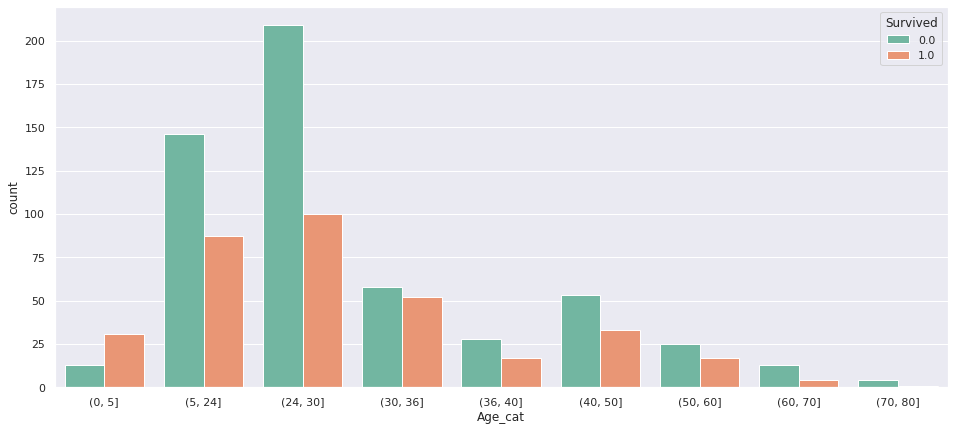

In [20]:
plt.figure(figsize=(16, 7))
train['Age_cat'] = pd.cut(train.Age, bins=[0, 5, 24, 30, 36, 40, 50, 60, 70, 80])

sns.countplot(data=train, x='Age_cat', hue='Survived', palette=palette_binary_3)

plt.show()

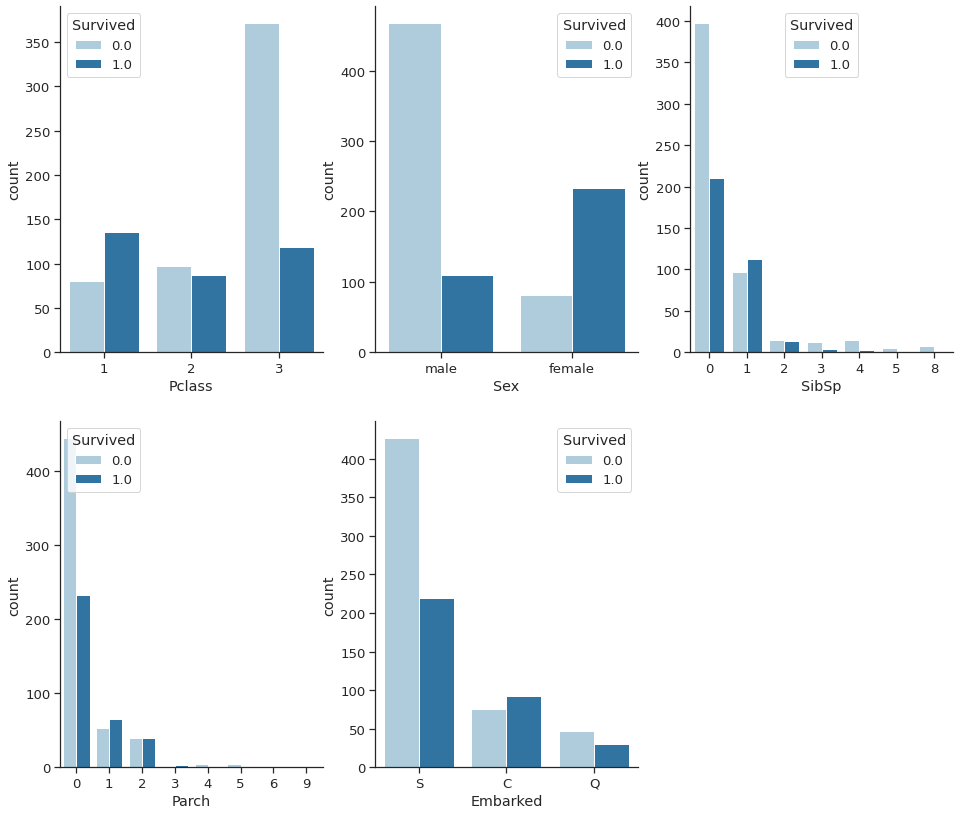

In [21]:
cat_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(cat_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=train, x=feature, hue='Survived', palette=palette_5)  
    
sns.despine()

In [22]:
# percent of Survived male
male = train.loc[train.Sex == 'male']["Survived"]
rate_male =sum(male)/len(male)*100
print(rate_male)

nan


In [23]:
# percent of Survived female
Female = train.loc[train.Sex == 'female']["Survived"]
rate_Female =sum(Female)/len(Female)*100
print(rate_Female)

nan


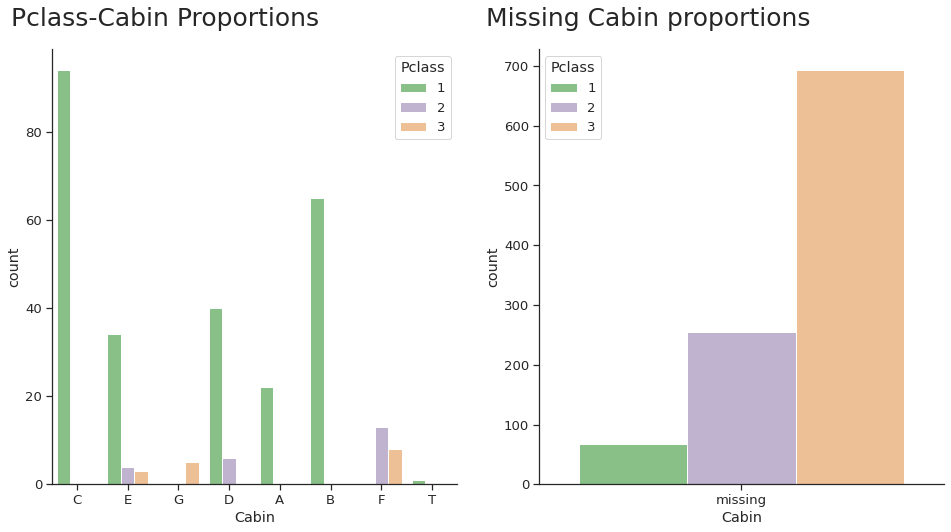

In [24]:
temp = train.copy()
temp['Cabin'] = temp.Cabin.str.extract(pat='([A-Z])')

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.set_style('ticks')

sns.countplot(data=temp, x='Cabin', hue='Pclass', ax=ax[0], palette=palette_1)
ax[0].set_title('Pclass-Cabin Proportions', x=0.28, y=1.04, size=25)

temp.Cabin.fillna('missing', inplace=True)
temp_missing = temp.loc[temp.Cabin == 'missing']

sns.countplot(data=temp_missing, x='Cabin', hue='Pclass', palette=palette_1)
ax[1].set_title('Missing Cabin proportions', x=0.27, y=1.04, size=25)

sns.despine()
plt.show()

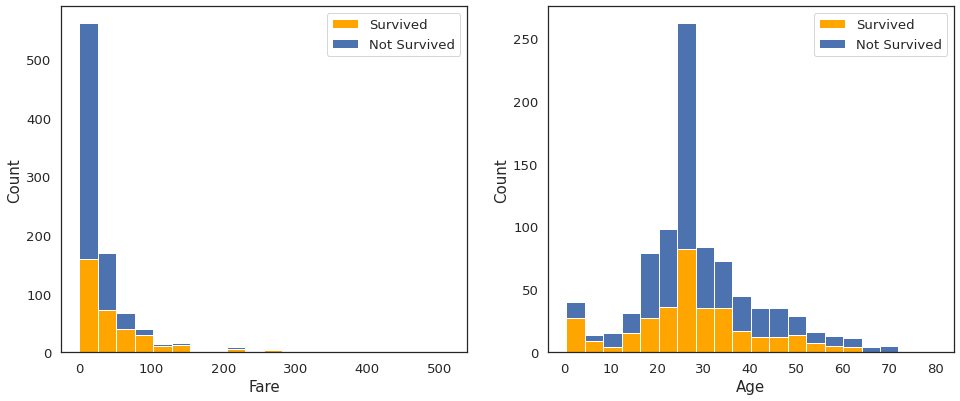

In [25]:
num_features = ['Fare', 'Age']
sns.set_style('white')

plt.figure(figsize=(16, 14))
for i, feature in enumerate(num_features):
    plt.subplot(2, 2, i+1)
    plt.hist(x=[train[feature][train['Survived'] == 1], train[feature][train['Survived']==0]],
            stacked=True, label=['Survived', 'Not Survived'], bins=20, color=['orange', 'b'])
    plt.legend()
    plt.xlabel(f'{feature}', fontsize=15)
    plt.ylabel('Count', fontsize=15)

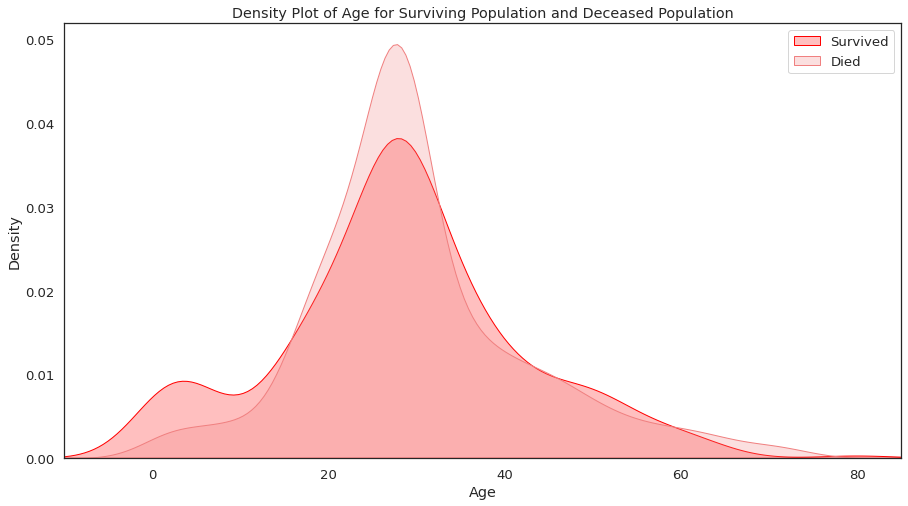

In [26]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["Age"][train.Survived == 1], color="red", shade=True)
sns.kdeplot(train["Age"][train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

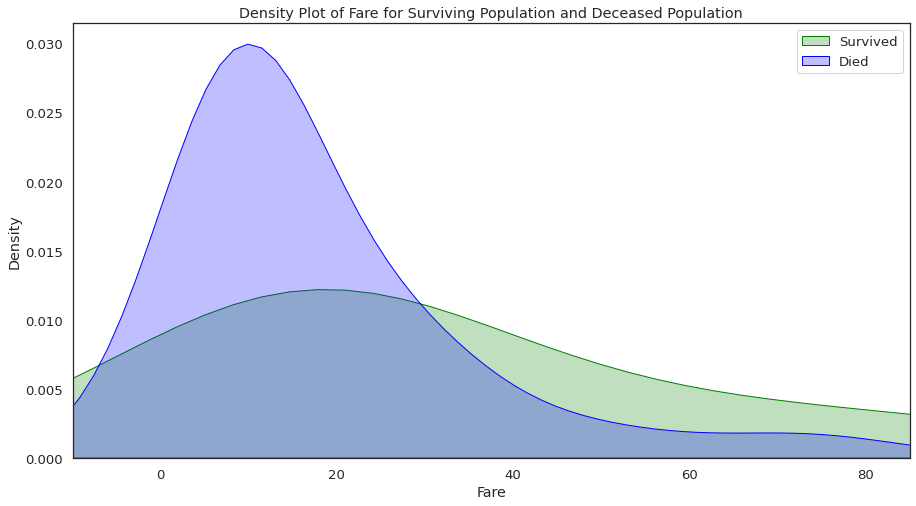

In [27]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["Fare"][train.Survived == 1], color="green", shade=True)
sns.kdeplot(train["Fare"][train.Survived == 0], color="blue", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-10,85)
plt.show()

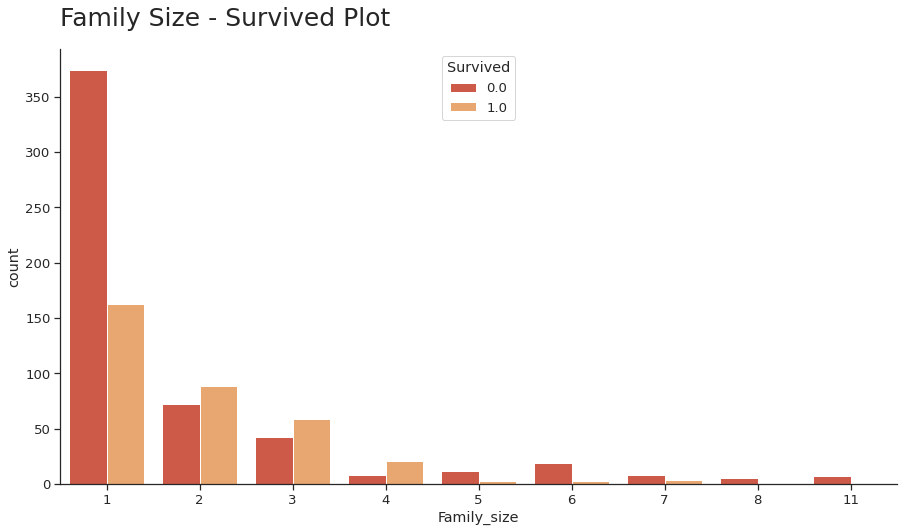

In [28]:
temp = train.copy()
temp['Family_size'] = temp['SibSp']+temp['Parch']+1 # +1cause if there is no sibsb or parch then it would consider alone pass
sns.set_style('ticks')

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.countplot(data=temp, x='Family_size', hue='Survived', ax=ax, palette=palette_6)
ax.set_title('Family Size - Survived Plot', size=25, loc='Left', y=1.04)

sns.despine()
plt.show()

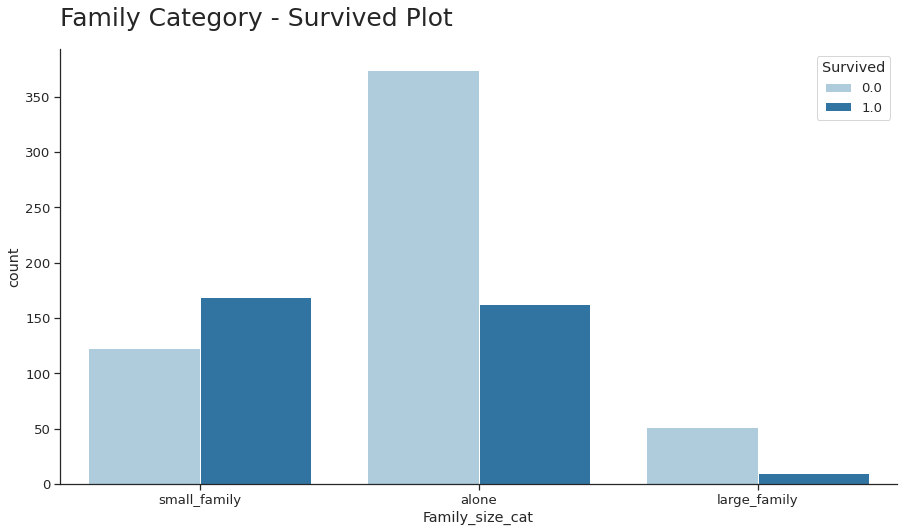

In [29]:
temp['Family_size_cat'] = temp['Family_size'].replace({1:'alone', 2:'small_family', 3:'small_family', 4:'small_family'
                                                      ,5:'large_family', 6:'large_family', 7:'large_family'
                                                      ,8:'large_family', 9:'large_family', 10:'large_family', 
                                                       11:'large_family'})

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.set_style('ticks')

sns.countplot(data=temp, x='Family_size_cat', hue='Survived', ax=ax, palette=palette_5)
ax.set_title('Family Category - Survived Plot', size=25, loc='Left', y=1.04)

sns.despine()
plt.show()

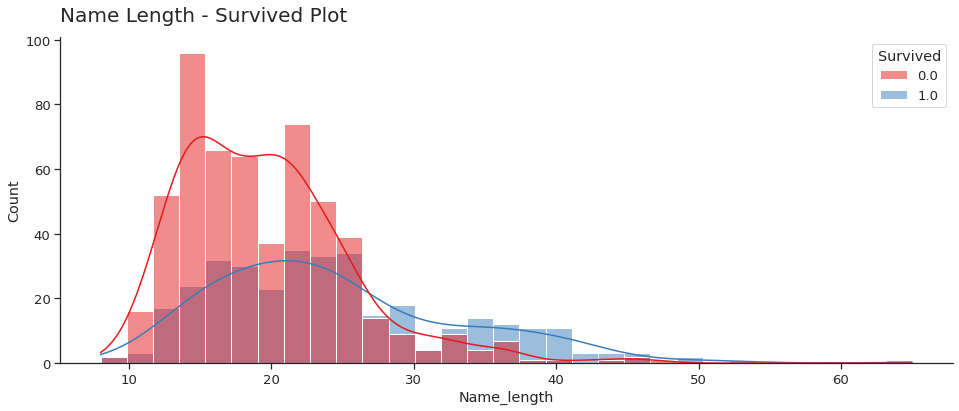

In [30]:
temp = train.copy()
temp['Name_length'] = temp.Name.str.replace(pat='[^a-zA-Z]', repl='').str.len()
sns.set_style('ticks')

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.histplot(data=temp, x='Name_length', hue='Survived', kde=True, fill=True, ax=ax, palette=palette_binary_2)
ax.set_title('Name Length - Survived Plot', size=20, loc='Left', y=1.03)

sns.despine()
plt.show()

###### Great!! we can see that with increase in the name length the survival rate increases!! from about name_length 26 more pople with name length more than 26 survived than not survived.

In [31]:
temp = train.copy()

temp['Title'] = temp.Name.str.extract(pat='([a-zA-Z]+\.)')

temp.Title[~temp.Title.isin(['Mr.', 'Miss.', 'Mrs.', 'Master.'])] = 'rare'

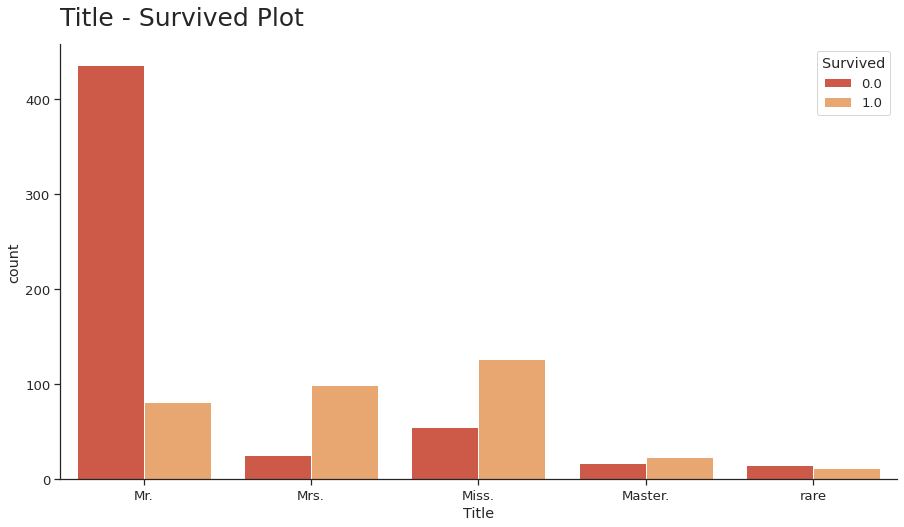

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.set_style('ticks')

sns.countplot(data=temp, x='Title', hue='Survived', ax=ax, palette=palette_6)
ax.set_title('Title - Survived Plot', loc='Left', size=25, y=1.03)

sns.despine()
plt.show()

In [33]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(5, 24]",Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(36, 40]",Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(24, 30]",Miss.
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 36]",Mrs.
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 36]",Mr.


## Create Dummy variables

In [34]:
df = pd.get_dummies(train, columns=["Pclass","Embarked","Sex"])
df.drop('Sex_female', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)
df.drop('Age_cat', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Pclass_3', axis=1, inplace=True)
df.drop('Embarked_C', axis=1, inplace=True)

df.head()

,PassengerId,Survived,Age,Fare,Pclass_1,Pclass_2,Embarked_Q,Embarked_S,Sex_male
0,1,0.0,22.0,7.2500,0,0,0,1,1
1,2,1.0,38.0,71.2833,1,0,0,0,0
2,3,1.0,26.0,7.9250,0,0,0,1,0
3,4,1.0,35.0,53.1000,1,0,0,1,0
4,5,0.0,35.0,8.0500,0,0,0,1,1


## Correlation Heatmap

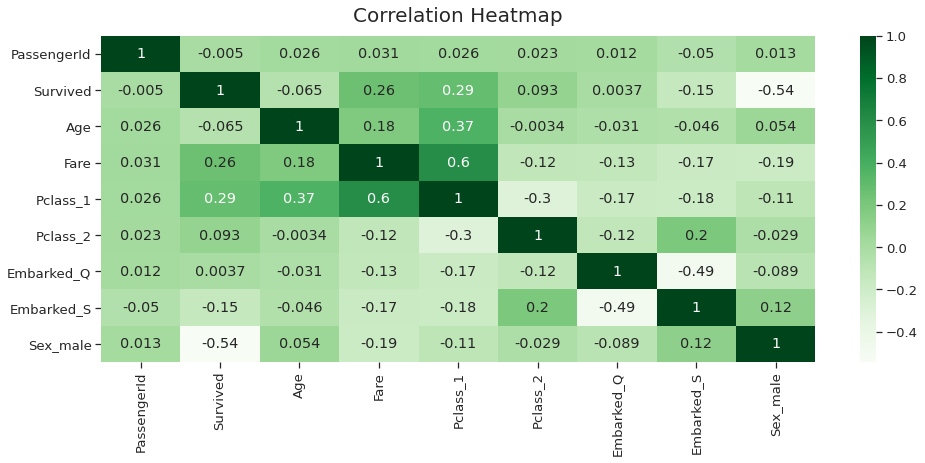

In [35]:
plt.figure(figsize=(16, 6))
heatmap =sns.heatmap(df.corr(), annot = True, cmap= 'Greens')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':20}, pad =14);

## Logistic Regression

In [36]:
from sklearn.metrics import classification_report
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
from sklearn.metrics import roc_curve
from statsmodels.tools import add_constant
import warnings
warnings.filterwarnings('ignore')

In [37]:
new_train = df.iloc[:891,:]
new_test = df.iloc[891:,:]

In [38]:
new_train[['Survived']]=new_train[['Survived']].astype('int64')

In [39]:
x = new_train.drop(['Survived'], axis=1)
y = new_train[['Survived']]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) # 70% training and 30% test

In [66]:
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [67]:
logReg = LogisticRegression().fit(x_train, y_train)
train_pred = logReg.predict(x_train)
test_pred = logReg.predict(x_test)

print('train set accuracy:', accuracy_score(y_train, train_pred))
print(' test set accuracy:', accuracy_score(y_test, test_pred))

train set accuracy: 0.7829341317365269
 test set accuracy: 0.8251121076233184


## Logit

In [68]:
x_cons = sm.add_constant(x)

In [69]:
result = sm.Logit(y, x_cons).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.447928
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Mon, 24 May 2021   Pseudo R-squ.:                  0.3273
Time:                        03:33:06   Log-Likelihood:                -399.10
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 5.537e-79
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.4813      0.350      4.234      0.000       0.796       2.167
PassengerId     0.0001      0.000      0.347      0.729      -0.001       0.001
Age            -0.0328      0.007     -4.399      0.000      -0.047      -0.018
Fare            0.0002      0.002      0.086      0.931      -0.004       0.004
Pclass_1        2.2787      0.289      7.893      0.000       1.713       2.845
Pclass_2        1.3289      0.234      5.677      0.000       0.870       1.788
Embarked_Q     -0.0044      0.370     -0.012      0.990      -0.729       0.721
Embarked_S     -0.5373      0.236     -2.278      0.023      -1.000      -0.075
Sex_male       -2.5798      0.189    -13.626      0.000      -2.951      -2.209
===============================================================================
"""

In [70]:
x.drop(['Fare'], axis=1, inplace=True)

result = sm.Logit(y, x).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.459320
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Mon, 24 May 2021   Pseudo R-squ.:                  0.3102
Time:                        03:33:07   Log-Likelihood:                -409.25
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.957e-76
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
PassengerId     0.0008      0.000      2.524      0.012       0.000       0.001
Age            -0.0172      0.006     -2.734      0.006      -0.030      -0.005
Pclass_1        2.3810      0.247      9.622      0.000       1.896       2.866
Pclass_2        1.4292      0.228      6.275      0.000       0.983       1.876
Embarked_Q      0.7136      0.326      2.188      0.029       0.074       1.353
Embarked_S      0.0372      0.195      0.191      0.849      -0.346       0.420
Sex_male       -2.4039      0.184    -13.041      0.000      -2.765      -2.043
===============================================================================
"""

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=254)

logReg = LogisticRegression().fit(x_train, y_train)
train_pred = logReg.predict(x_train)
test_pred = logReg.predict(x_test)

print('New train set accuracy:', accuracy_score(y_train, train_pred))
print('New test set accuracy:', accuracy_score(y_test, test_pred))
pred_prob = logReg.predict_proba(x_test)

New train set accuracy: 0.7829341317365269
New test set accuracy: 0.8251121076233184


## Confusion Matrix Logistic

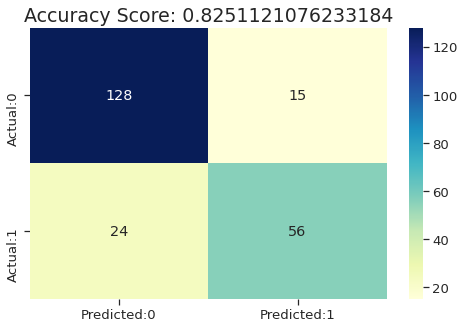

In [72]:
log_reg=accuracy_score(y_test, test_pred)
cm=confusion_matrix(y_test,test_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

all_sample_title = 'Accuracy Score: {0}'.format(log_reg)

plt.title(all_sample_title, size = 19)
plt.savefig("pne.png")

# Ensemble Techniques

In [73]:
from sklearn.metrics import classification_report
import statsmodels.api as sm
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, auc
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

In [74]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [75]:
#for decision tree object
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.tree import plot_tree
from sklearn import tree
from IPython.display import Image
import pydotplus

# Decision Tree

In [76]:
#Decision tree
clf = tree.DecisionTreeClassifier(criterion="gini",random_state = 42, max_depth=5,
                            min_samples_split=5,min_samples_leaf=1,min_impurity_decrease = 0.001)
                            
clf = clf.fit(x_train,y_train)

#Predict the response
y_pred1 = clf.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred1))
Dtree=accuracy_score(y_test, y_pred1)

Classification report - 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       143
           1       0.72      0.75      0.74        80

    accuracy                           0.81       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



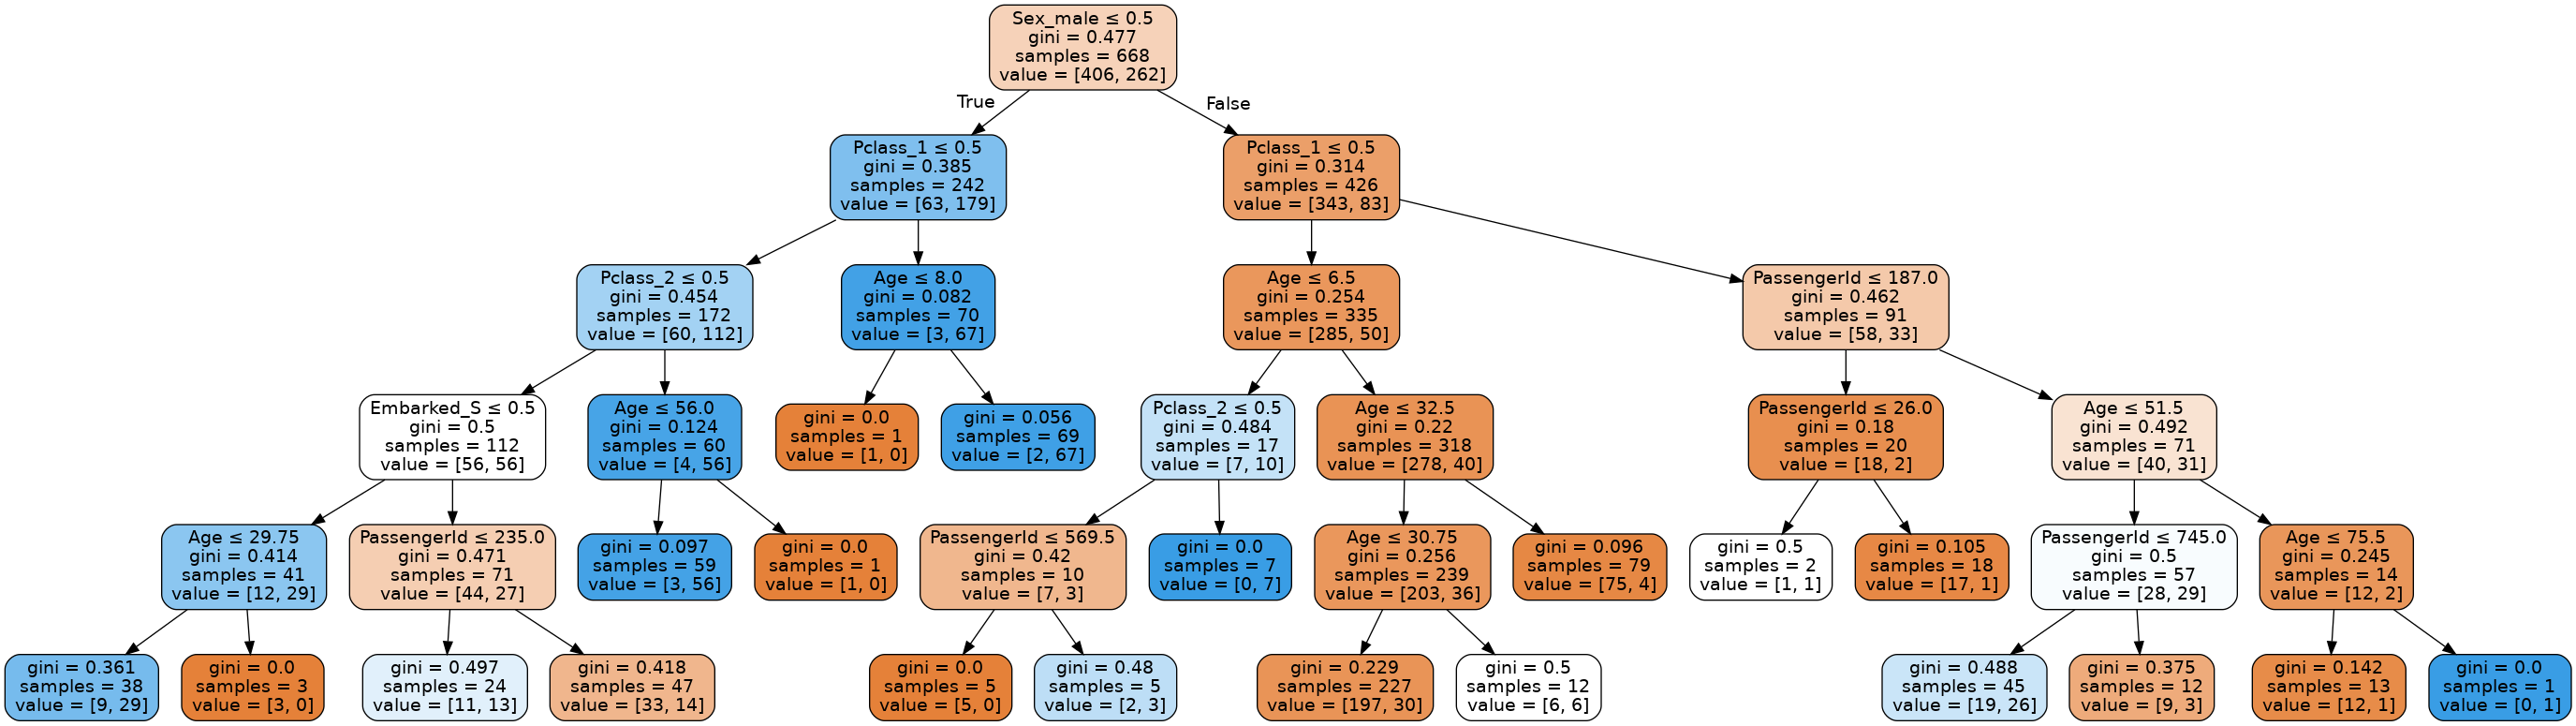

In [77]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                              feature_names=x_train.columns, 
                              filled=True, rounded=True,  
                              special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

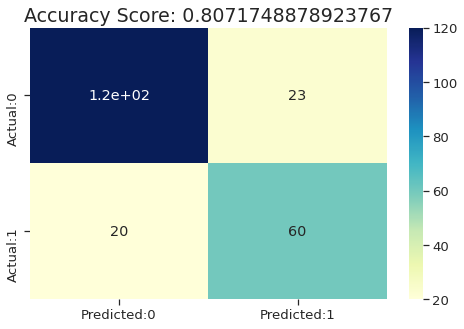

In [78]:
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize = (8,5))

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,  cmap = 'YlGnBu')

# print the scores on training and test set
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred1))

plt.title(all_sample_title, size = 19)
plt.savefig("pne.png")

# Bagging

In [79]:
from sklearn.ensemble import BaggingClassifier

#Create Model
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=300,
                            bootstrap=True,bootstrap_features=True, n_jobs=-1,
                            random_state=42)
#fit model
bag_clf.fit(x_train, y_train)
y_pred2 = bag_clf.predict(x_test)
bagging = accuracy_score(y_test, y_pred2)

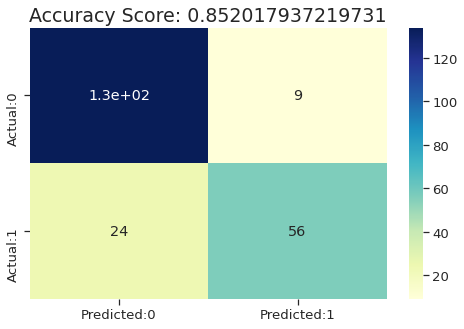

In [80]:
cm = confusion_matrix(y_test,y_pred2)
plt.figure(figsize = (8,5))

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,  cmap = 'YlGnBu')

# print the scores on training and test set
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred2))

plt.title(all_sample_title, size = 19)
plt.savefig("pne.png")

# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
#creating model
rf_clf = RandomForestClassifier(criterion = 'gini',
                                n_estimators=700,
                                oob_score= True,
                                max_features ='log2',
                                min_samples_split=10,
                                min_samples_leaf=3,
                                bootstrap=True,
                                n_jobs=-1,
                                random_state=1)
#fitting model
rf_clf.fit(x_train, y_train)
y_pred3 = rf_clf.predict(x_test)
RF=accuracy_score(y_test, y_pred3)

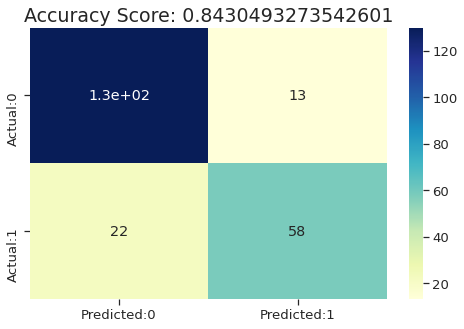

In [82]:
cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize = (8,5))

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,  cmap = 'YlGnBu')

# print the scores on training and test set
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred3))

plt.title(all_sample_title, size = 19)
plt.savefig("pne.png")

# Adaboost

In [83]:
from sklearn.ensemble import AdaBoostClassifier

# Ada boosting tunning
dtree = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state =42)

adaclass = AdaBoostClassifier(base_estimator=dtree,
                             n_estimators = 300,
                             learning_rate = 0.01,
                             algorithm= 'SAMME',
                             random_state = 42)


adaclass.fit(x_train,y_train)
y_pred4 = adaclass.predict(x_test)
Ada =accuracy_score(y_test, y_pred4)

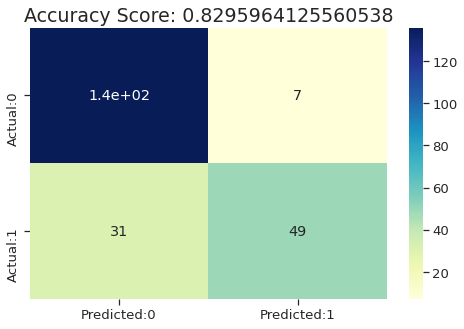

In [84]:
cm = confusion_matrix(y_test, y_pred4)
plt.figure(figsize = (8,5))

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,  cmap = 'YlGnBu')

# print the scores on training and test set
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred4))

plt.title(all_sample_title, size = 19)
plt.savefig("pne.png")

# Gradient Boosting

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
# create model
gradclass =  GradientBoostingClassifier(learning_rate=0.3, loss='deviance', max_depth=5,
                                         max_features='auto',min_impurity_decrease=0.001, min_impurity_split=None,
                                         min_samples_leaf=1, min_samples_split = 4, n_estimators=300)
                                    

#fit model
gradclass.fit(x_train,y_train)
y_pred5 = gradclass.predict(x_test)
Grad=accuracy_score(y_test, y_pred5)

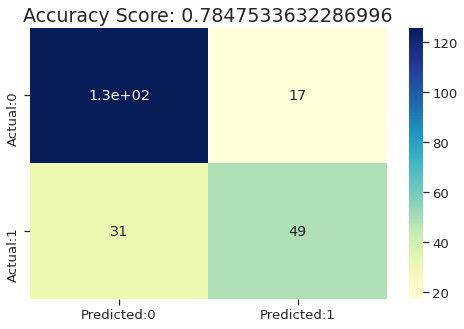

In [86]:
y_pred= gradclass.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,5))

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,  cmap = 'YlGnBu')

# print the scores on training and test set
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))

plt.title(all_sample_title, size = 19)
plt.savefig("pne.png")

# XG Boost 

In [87]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import model_selection

In [88]:
xgb = XGBClassifier(
     learning_rate = 0.1,
     n_estimators = 1000,
     max_depth = 3,
     min_child_weight=1,
     gamma = 0.1,
     alpha = 1e-05, 
     subsample = 0.9,
     colsample_bytree = 0.6,
     objective = 'binary:logistic',
     nthread = 5,
     scale_pos_weight =1,
     seed = 27)

xgb.fit(x_train, y_train)
y_pred6=xgb.predict(x_test)
XGB=accuracy_score(y_test, y_pred6)
XGB

[03:33:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7847533632286996

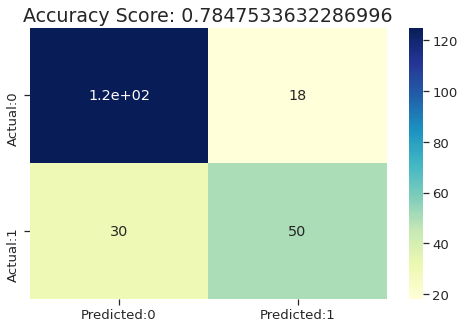

In [89]:
cm = confusion_matrix(y_test, y_pred6)
plt.figure(figsize = (8,5))

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,  cmap = 'YlGnBu')

# print the scores on training and test set
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred6))

plt.title(all_sample_title, size = 19)
plt.savefig("pne.png")

In [90]:
models = pd.DataFrame({
    'Model': ['Logistic Regreesion','Decision Tree','Bagging','Random Forest', 'Gradient boosting', 
              'Adaboost', 'XG Boost'],

    'Score': [log_reg,Dtree, bagging, RF, Grad, Ada,XGB]})
models.sort_values(by='Score', ascending=True)

,Model,Score
4,Gradient boosting,0.784753
6,XG Boost,0.784753
1,Decision Tree,0.807175
0,Logistic Regreesion,0.825112
5,Adaboost,0.829596
3,Random Forest,0.843049
2,Bagging,0.852018


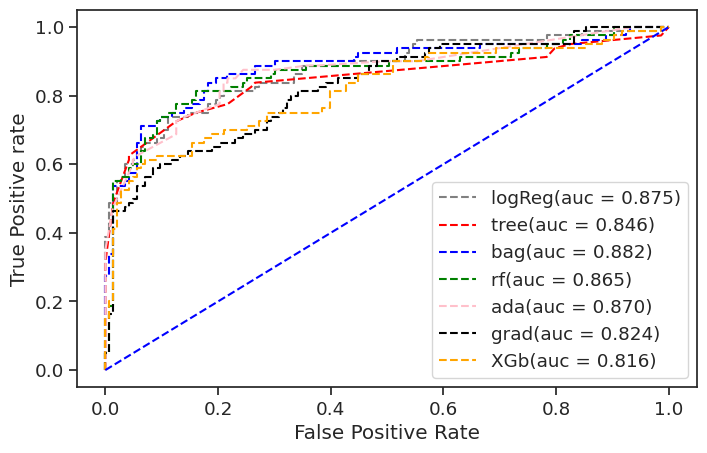

In [100]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

y_score0 = logReg.predict_proba(x_test)[:,1]
log_fpr, log_tpr, thresh = roc_curve(y_test, y_score0)
auc_log = auc(log_fpr, log_tpr)

y_score1 = clf.predict_proba(x_test)[:,1]
tree_fpr, tree_tpr, thresh = roc_curve(y_test, y_score1)
auc_tree = auc(tree_fpr, tree_tpr)

y_score2 = bag_clf.predict_proba(x_test)[:,1]
bag_fpr, bag_tpr, thresh = roc_curve(y_test, y_score2)
auc_bag = auc(bag_fpr, bag_tpr)

y_score3 = rf_clf.predict_proba(x_test)[:,1]
rf_fpr, rf_tpr, thresh = roc_curve(y_test, y_score3)
auc_rf = auc(rf_fpr, rf_tpr)

y_score4 = adaclass.predict_proba(x_test)[:,1]
ada_fpr, ada_tpr, thresh = roc_curve(y_test, y_score4)
auc_ada = auc(ada_fpr, ada_tpr)

y_score5 = gradclass.predict_proba(x_test)[:,1]
grad_fpr, grad_tpr, thresh = roc_curve(y_test, y_score5)
auc_grad = auc(grad_fpr, grad_tpr)

y_score6 = xgb.predict_proba(x_test)[:,1]
xgb_fpr, xgb_tpr, thresh = roc_curve(y_test, y_score6)
auc_xgb = auc(xgb_fpr, xgb_tpr)


plt.figure(figsize=(8, 5), dpi = 100)
# plot roc curves
plt.plot(log_fpr, log_tpr, linestyle='--',color='grey', label='logReg(auc = %0.3f)'%auc_log)
plt.plot(tree_fpr, tree_tpr, linestyle='--',color='red', label='tree(auc = %0.3f)'%auc_tree)
plt.plot(bag_fpr, bag_tpr, linestyle='--',color='blue', label='bag(auc = %0.3f)'%auc_bag)
plt.plot(rf_fpr, rf_tpr, linestyle='--',color='green', label='rf(auc = %0.3f)'%auc_rf)
plt.plot(ada_fpr, ada_tpr, linestyle='--',color='pink', label='ada(auc = %0.3f)'%auc_ada)
plt.plot(grad_fpr, grad_tpr, linestyle='--',color='black', label='grad(auc = %0.3f)'%auc_grad)
plt.plot(xgb_fpr, xgb_tpr, linestyle='--',color='orange', label='XGb(auc = %0.3f)'%auc_xgb)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# x label y label
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

In [101]:
submit = pd.DataFrame({"PassengerId":x_test.PassengerId, "Survived":y_pred2})
submit.to_csv("submissionT.csv", index = False)